In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../../data/input/probspace/train_data.csv")
test  = pd.read_csv("../../data/input/probspace/test_data.csv")

In [3]:
train.shape

(19720, 17)

In [19]:
train[['likes', 'dislikes', 'comment_count', 'y']][(train['comments_disabled'] == True) & (train['ratings_disabled'] == True)]

,likes,dislikes,comment_count,y
83,0,0,0,15056
219,0,0,0,658
237,0,0,0,29185
239,0,0,0,8013
258,0,0,0,5259
...,...,...,...,...
19634,0,0,0,6377
19651,0,0,0,90468
19657,0,0,0,4027999
19699,0,0,0,90541


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 19720 non-null  int64 
 1   video_id           19720 non-null  object
 2   title              19720 non-null  object
 3   publishedAt        19720 non-null  object
 4   channelId          19720 non-null  object
 5   channelTitle       19720 non-null  object
 6   categoryId         19720 non-null  int64 
 7   collection_date    19720 non-null  object
 8   tags               19719 non-null  object
 9   likes              19720 non-null  int64 
 10  dislikes           19720 non-null  int64 
 11  comment_count      19720 non-null  int64 
 12  thumbnail_link     19720 non-null  object
 13  comments_disabled  19720 non-null  bool  
 14  ratings_disabled   19720 non-null  bool  
 15  description        19408 non-null  object
 16  y                  19720 non-null  int64

In [7]:
# メモリ削減
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [8]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 2.29 MB
Memory usage after optimization is: 6.14 MB
Decreased by -167.8%


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 19720 non-null  int16   
 1   video_id           19720 non-null  category
 2   title              19720 non-null  category
 3   publishedAt        19720 non-null  category
 4   channelId          19720 non-null  category
 5   channelTitle       19720 non-null  category
 6   categoryId         19720 non-null  int8    
 7   collection_date    19720 non-null  category
 8   tags               19719 non-null  category
 9   likes              19720 non-null  int32   
 10  dislikes           19720 non-null  int32   
 11  comment_count      19720 non-null  int32   
 12  thumbnail_link     19720 non-null  category
 13  comments_disabled  19720 non-null  float16 
 14  ratings_disabled   19720 non-null  float16 
 15  description        19408 non-null  category
 16  y   

In [10]:
%%time
stats = []
for col in train.columns:
    stats.append((col,
                  train[col].nunique(),
                  train[col].value_counts().index[0],
                  train[col].value_counts().values[0],
                  train[col].isnull().sum() * 100 / train.shape[0],
                  train[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                  train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique values', 'Most frequent item', 'Freuquence of most frequent item', 'Percentage of missing values', 'Percentage of values in the biggest category', 'Type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

CPU times: user 236 ms, sys: 17.3 ms, total: 254 ms
Wall time: 323 ms


,Feature,Unique values,Most frequent item,Freuquence of most frequent item,Percentage of missing values,Percentage of values in the biggest category,Type
15,description,18654,,180,1.582150,1.582150,category
8,tags,17808,[none],916,0.005071,4.645030,category
9,likes,7973,0,1482,0.000000,7.515213,int32
14,ratings_disabled,2,0,18397,0.000000,93.291075,float16
13,comments_disabled,2,0,17597,0.000000,89.234280,float16
12,thumbnail_link,19720,https://i.ytimg.com/vi/zzmFFHRFEqI/default.jpg,1,0.000000,0.005071,category
11,comment_count,3103,0,3619,0.000000,18.351927,int32
10,dislikes,2506,0,2737,0.000000,13.879310,int32
0,id,19720,2047,1,0.000000,0.005071,int16
1,video_id,19720,zzmFFHRFEqI,1,0.000000,0.005071,category


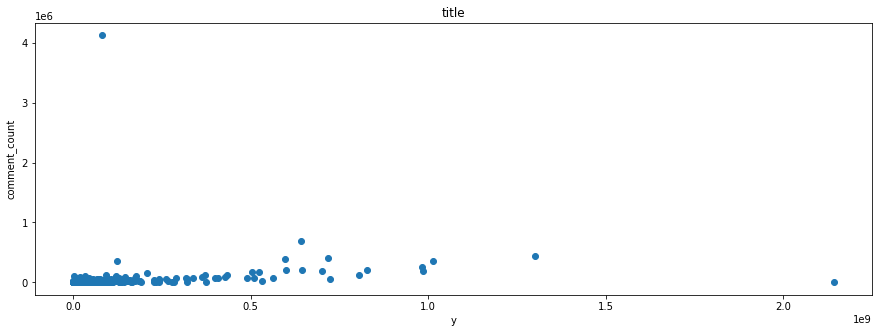

In [13]:
plt.figure(figsize=(15, 5))
plt.scatter(train['y'], train['comment_count'])
plt.title('title')
plt.xlabel('y')
plt.ylabel('comment_count')
plt.show()

In [14]:
train.corr()["y"].sort_values()

categoryId          -0.034314
comments_disabled   -0.023267
id                  -0.004559
ratings_disabled    -0.001004
comment_count        0.240803
dislikes             0.740316
likes                0.801431
y                    1.000000
Name: y, dtype: float64